In [22]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from utils import *
import copy
import math
%matplotlib inline


In [23]:
x_train, y_train = load_data()

In [29]:
print('Type of x_train: ', type(x_train))
print('First five elements of x_train are: \n', x_train[:5])

Type of x_train:  <class 'numpy.ndarray'>
First five elements of x_train are: 
 [6.1101 5.5277 8.5186 7.0032 5.8598]


In [30]:
print('Type of y_train: ', type(y_train))
print('First five elements of y_train are:  \n:', y_train[:5])

Type of y_train:  <class 'numpy.ndarray'>
First five elements of y_train are:  
: [17.592   9.1302 13.662  11.854   6.8233]


In [34]:
print('The shape of x_train is: ', x_train.shape)
print('The shape of y_train is: ', y_train.shape)
print('Number of training examples (m) is: ', len(x_train))

The shape of x_train is:  (97,)
The shape of y_train is:  (97,)
Number of training examples (m) is:  97


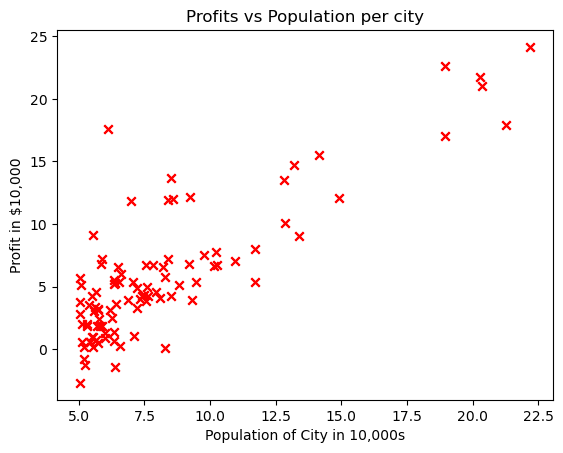

In [38]:
plt.scatter(x_train, y_train, marker = 'x', c='r')
plt.title('Profits vs Population per city')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [69]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    total_cost = 0
    
    cost = 0
    cost_sum = 0
    for i in range(m):
        f_wb = w*x[i] +b
        cost = (f_wb - y[i])**2
        cost_sum = cost_sum + cost
        total_cost = (1 / (2*m)) * cost_sum
    return total_cost

In [80]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

print(f"{cost:.3f}")

<class 'numpy.float64'>
Cost at initial w (zeros): 75.203
All tests passed!
75.203


In [131]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i]+b
        dj_dw = dj_dw + (f_wb - y[i])*x[i]
        dj_db = dj_db + (f_wb - y[i])
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return  dj_dw, dj_db

In [132]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [133]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [160]:
import math, copy

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")

    return w, b, J_history, w_history


In [161]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [162]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

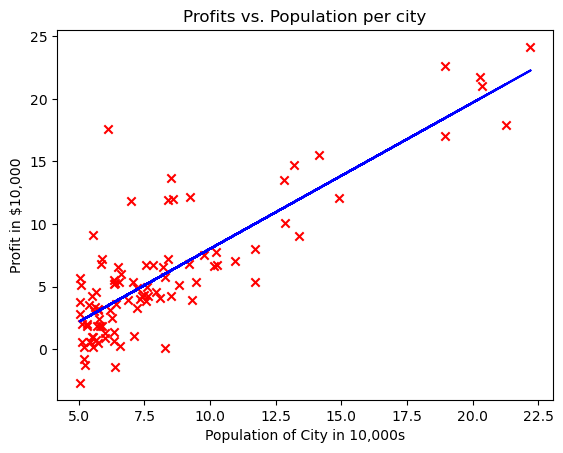

In [163]:
plt.plot(x_train, predicted, c = "b")
plt.scatter(x_train, y_train, marker='x', c='r') 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [164]:

predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
